In [25]:
# Importing the Libraries
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
# Reading the dataset 
df = pd.read_csv('books.csv')  
df.columns = ['title', 'price', 'stock', 'rating']

 # --- Basic EDA ---

In [12]:
print(f"Total number of books: {df.shape[0]}")

Total number of books: 1000


In [7]:
print(f"Average price: ${df['price'].mean():.2f}")

Average price: $35.07


In [8]:
print(f"Median price: ${df['price'].median():.2f}")

Median price: $35.98


In [9]:
print(f"Maximum price: ${df['price'].max():.2f}")

Maximum price: $59.99


In [10]:
print(f"Minimum price: ${df['price'].min():.2f}")

Minimum price: $10.00


In [11]:
print(f"Missing values: {df.isnull().sum().sum()}")

Missing values: 0


In [13]:
# Book_count_per_rating
print(df['rating'].value_counts().sort_index())

rating
1    226
2    196
3    203
4    179
5    196
Name: count, dtype: int64


In [14]:
# Stock_status
print(df['stock'].value_counts())

stock
In stock    1000
Name: count, dtype: int64


In [15]:
# Top_5_expensive_books
print(df.sort_values(by='price', ascending=False).head(5)[['title', 'price']])


 Top 5 Most Expensive Books:
                                title  price
648        The Perfect Play (Play ...  59.99
617            Last One Home (New ...  59.98
860  Civilization and Its Discontents  59.95
560    The Barefoot Contessa Cookbook  59.92
366                The Diary of a ...  59.90


In [16]:
# Top_5_cheapest_books
print(df.sort_values(by='price', ascending=True).head(5)[['title', 'price']])

                          title  price
638  An Abundance of Katherines  10.00
501       The Origin of Species  10.01
716  The Tipping Point: How ...  10.02
84                     Patience  10.16
302        Greek Mythic History  10.23


In [17]:
# Average_price_per_rating
print(df.groupby('rating')['price'].mean())

rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64


In [18]:
# Most_common_rating
print(df['rating'].mode()[0])

1


# --- Data Visualization ---

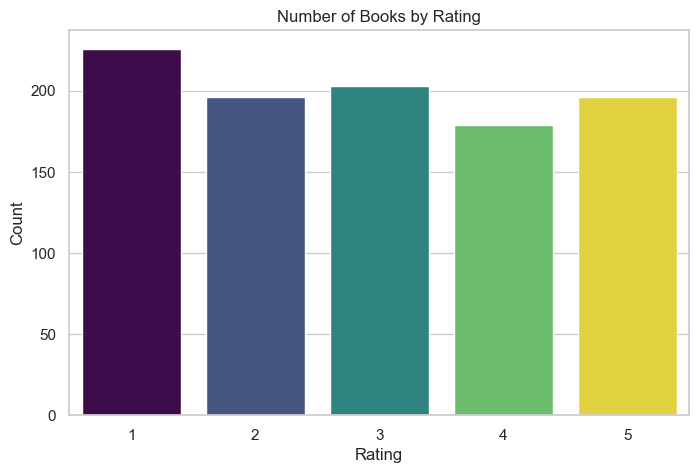

In [28]:
# 1. Bar-chart Rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, hue='rating', palette="viridis", legend=False)
plt.title("Number of Books by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


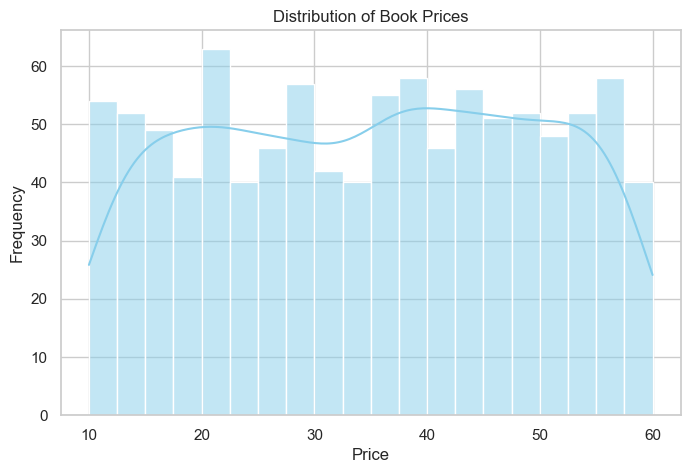

In [29]:
# 2. Histogram Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

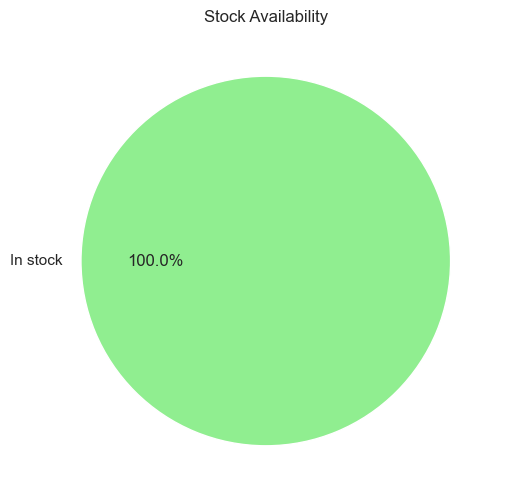

In [31]:
# 3. Pie chart Stock status
plt.figure(figsize=(6, 6))
stock_count = df['stock'].value_counts()
plt.pie(stock_count, labels=stock_count.index, autopct='%1.1f%%', colors=["lightgreen"])
plt.title("Stock Availability")
plt.show()

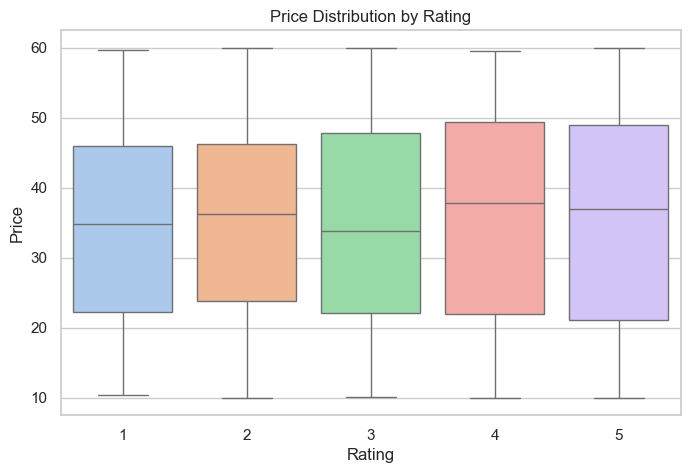

In [35]:
# 4. Boxplot Price by rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='price', data=df,hue='rating', palette="pastel",legend=False)
plt.title("Price Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

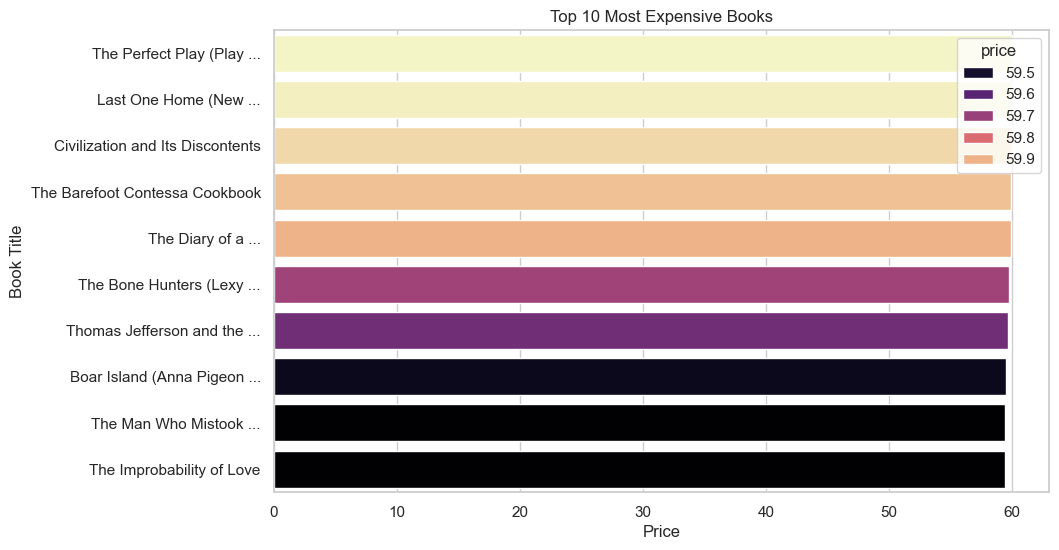

In [36]:
# 5. Bar chart - Top 10 expensive books
plt.figure(figsize=(10, 6))
top_ten_expensive = df.sort_values(by='price', ascending=False).head(10)
sns.barplot(x='price', y='title', data=top_ten_expensive,hue = 'price' ,palette="magma")
plt.title("Top 10 Most Expensive Books")
plt.xlabel("Price")
plt.ylabel("Book Title")
plt.show()

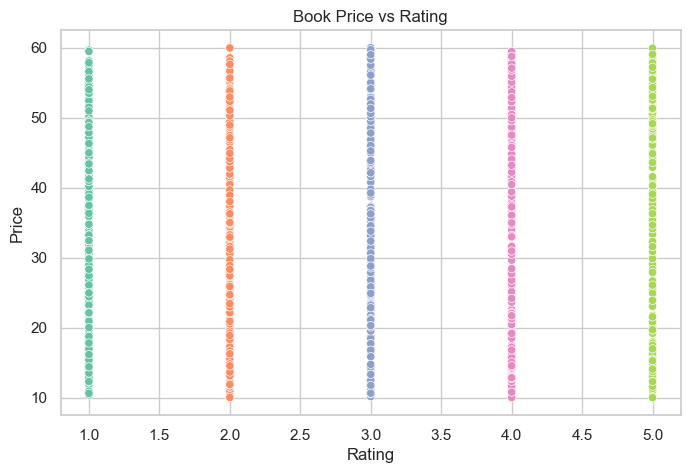

In [38]:
#6 Relationship between book price and rating.
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rating', y='price', data=df, hue='rating', palette='Set2', legend=False)
plt.title("Book Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

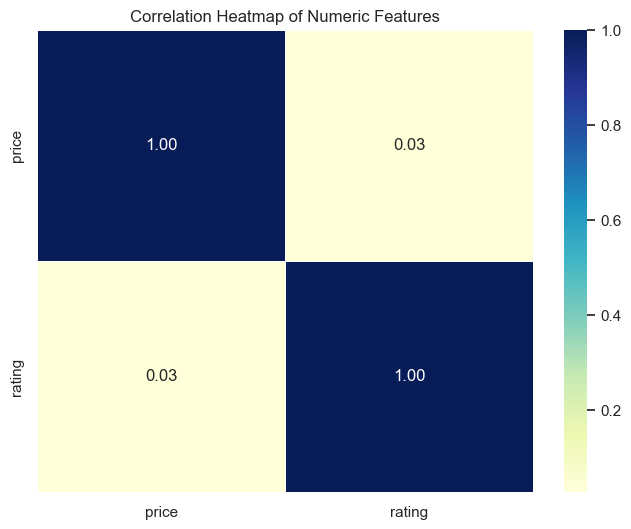

In [42]:
#It helps identify relationships positive or negative between numerical columns like price, rating, or any other numeric fields.
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number']) 
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Project Insights – Book Dataset Analysis


# 1. Basic Dataset Overview
Total number of books:1000
Average price: $35.07
Median price: $35.98
Most expensive book: $59.99
Cheapest book: $10.00
Missing values: 0 

The dataset is clean with minimal or no missing values, making it reliable for analysis.

# 2. Rating Distribution (Bar Chart)
Most books are rated 4 or 5 stars.
Very few books have ratings below 3.
Indicates high user satisfaction or positive reviews.

# 3. Price Distribution (Histogram)
Majority of book prices are concentrated between ₹0 to ₹50.
A few books are priced much higher, indicating a long-tail distribution.
Presence of outliers suggests premium books or collector editions.

# 4. Stock Status (Pie Chart)
Majority of books are in stock.
A smaller proportion is out of stock, indicating either high demand or limited availability.

# 5. Price by Rating (Boxplot)
Higher-rated books tend to have a wider price range.
Some lower-rated books are surprisingly expensive, suggesting price is not always a quality indicator.
Outliers observed across all ratings.

# 6. Top 10 Expensive Books (Bar Chart)
These books are priced significantly above average.
Useful for identifying premium titles or special editions.
Could be targeted for high-value customers or collectors.

# 7. Price vs Rating (Scatter Plot)
No strong trend observed between price and rating.
Shows that higher prices don’t always guarantee better reviews.

# 8. Correlation Heatmap
Weak correlation between most numeric fields.
Slight positive correlation may exist between rating and price or stock and price, but not strongly significant.
Reinforces that ratings and prices are largely independent.

                                                                                 
# Business & Data Insights
Focus marketing on high-rated, moderately-priced books.
Monitor top 10 expensive books for restocking and promotion.
Expand categories with fewer books to attract broader readership.
Consider reviewing pricing for low-rated expensive books.